In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("data/Tech_Gadget_Usage_and_Mental_Wellbeing.csv")

# =========================
# Initial Exploration
# =========================

In [6]:
df.head()

,User.ID,Age,Gender,Country,Device.Type,Daily.Screen.Time,Social.Media.Hours,Work.Screen.Hours,Gaming.Hours,Sleep.Hours,Sleep.Quality,Stress.Level,Physical.Activity.Min,Productivity.Score,Mental.Health.Status
0,1,54,Female,Germany,Tablet,5.0,1.9,6.0,0.9,6.5,9,8,106,2,Healthy
1,2,44,Other,Australia,Laptop,4.6,1.8,0.0,0.1,6.4,5,7,86,7,Healthy
2,3,30,Female,USA,Phone,3.5,4.1,5.3,1.5,6.1,5,2,66,4,Healthy
3,4,58,Female,Canada,Laptop,10.0,0.4,2.5,0.1,5.9,10,7,61,8,Healthy
4,5,23,Female,UK,Laptop,7.1,3.7,2.7,0.7,9.7,4,6,2,8,Chronic Issues


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User.ID                1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Country                1000 non-null   object 
 4   Device.Type            1000 non-null   object 
 5   Daily.Screen.Time      1000 non-null   float64
 6   Social.Media.Hours     1000 non-null   float64
 7   Work.Screen.Hours      1000 non-null   float64
 8   Gaming.Hours           1000 non-null   float64
 9   Sleep.Hours            1000 non-null   float64
 10  Sleep.Quality          1000 non-null   int64  
 11  Stress.Level           1000 non-null   int64  
 12  Physical.Activity.Min  1000 non-null   int64  
 13  Productivity.Score     1000 non-null   int64  
 14  Mental.Health.Status   1000 non-null   object 
dtypes: fl

In [8]:
print("\nSummary statistics:\n", df.describe(include='all'))


Summary statistics:
             User.ID          Age  Gender  Country Device.Type  \
count   1000.000000  1000.000000    1000     1000        1000   
unique          NaN          NaN       3        6           4   
top             NaN          NaN  Female  Germany      Laptop   
freq            NaN          NaN     505      186         373   
mean     500.500000    40.379000     NaN      NaN         NaN   
std      288.819436    14.122138     NaN      NaN         NaN   
min        1.000000    16.000000     NaN      NaN         NaN   
25%      250.750000    28.000000     NaN      NaN         NaN   
50%      500.500000    41.000000     NaN      NaN         NaN   
75%      750.250000    52.000000     NaN      NaN         NaN   
max     1000.000000    64.000000     NaN      NaN         NaN   

        Daily.Screen.Time  Social.Media.Hours  Work.Screen.Hours  \
count         1000.000000         1000.000000        1000.000000   
unique                NaN                 NaN                

### Summary Statistics Insights

#### 1. Dataset Overview
- **Total records**: 1000  
- **Categorical features**: `Gender`, `Country`, `Device.Type`, `Mental.Health.Status`  
- **Numeric features**: Age, Screen time metrics, Gaming hours, Sleep metrics, Stress level, Physical activity, Productivity score  

---

#### 2. Demographics
- **Age**: Ranges from **16 to 64 years**, with a mean of **~40.4 years**.  
  - The age distribution appears **well-spread** (std ~14.1).  
- **Gender**:  
  - Female: **505** (dominant group)  
  - Male: **~450**  
  - Other: **~45**  

---

#### 3. Device Usage
- **Daily Screen Time**: Averages **~6 hours/day** (min: 1 hr, max: 11.5 hrs).  
- **Work Screen Hours**: ~4 hrs/day (high variation; some report **0 hrs**).  
- **Social Media Hours**: ~2.5 hrs/day, up to **8 hrs/day** for some users.  
- **Gaming Hours**: Median **0.8 hrs/day**, with a few heavy gamers (**6 hrs**).

---

#### 4. Sleep & Health
- **Sleep Hours**: Mean of **~6.5 hrs/night** (range: 3.1–10 hrs).  
- **Sleep Quality**: Median **5/10**, wide spread (**std: 2.84**), indicating varying sleep satisfaction.  
- **Stress Level**: Median **6/10**, high variability (**1–10 range**).  
- **Mental Health Status**:  
  - **Healthy**: 614  
  - **Moderate Issues**: ~300  
  - **Chronic Issues**: ~90  

---

#### 5. Physical Activity
- **Physical Activity**: Average **~59 mins/day**, but some report **0 activity**.  
- **Distribution is wide**, ranging from **0 to nearly 2 hours** per day.

---

#### 6. Productivity
- **Productivity Score**: Average **~5.5/10**, with responses covering the full range (1–10).  
- Indicates a **balanced but slightly skewed distribution**, suggesting many average performers and fewer extremes.

---

#### Key Takeaways
- The dataset represents a **diverse demographic**, with balanced gender distribution and wide variation in lifestyle metrics.  
- **Screen time and sleep patterns** show significant variability, making them good predictors for further analysis.  
- **Mental health and productivity** distributions suggest potential links between screen usage, stress, and performance.  
- No glaring missing data issues; all variables have **complete counts**.

---

# =========================
# Univariate Analysis
# =========================

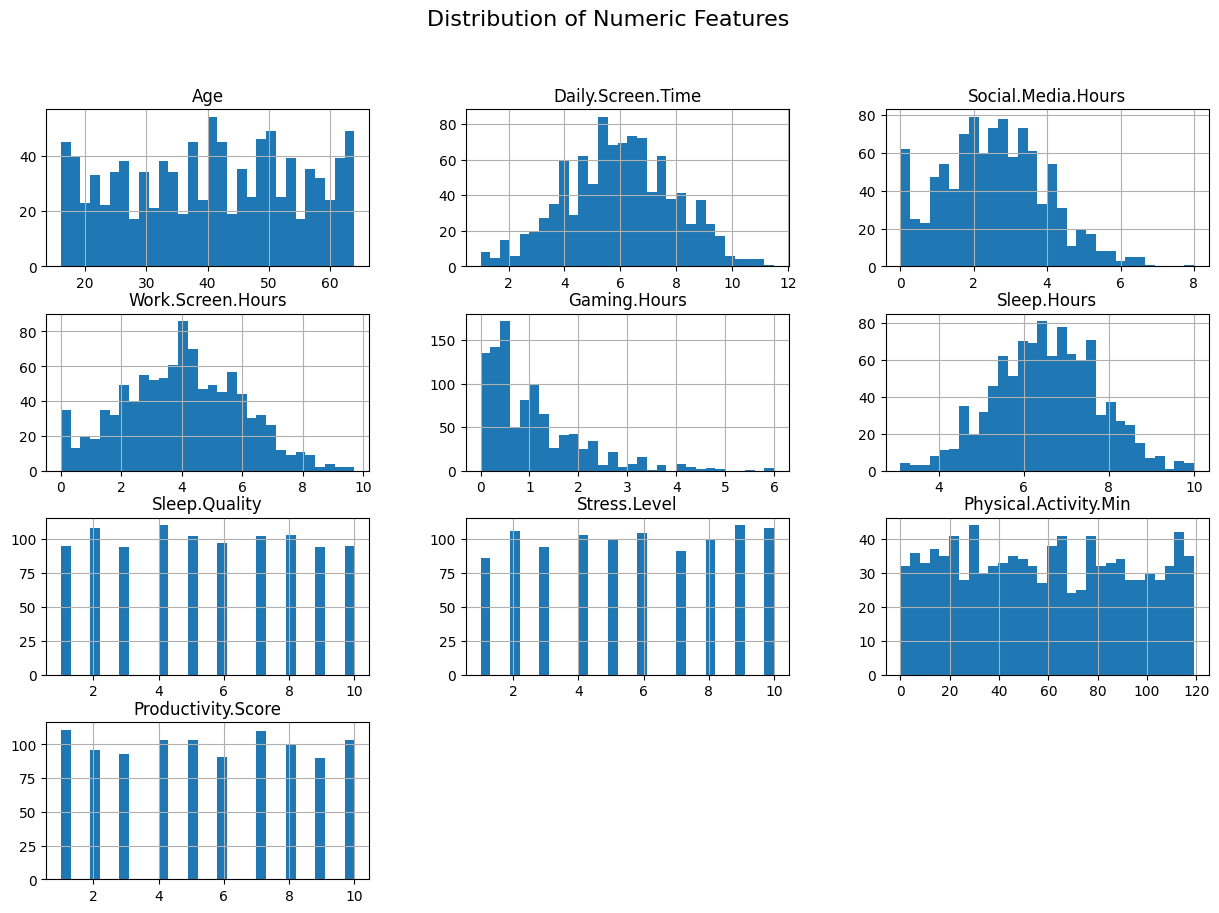

In [9]:
# Drop the User.ID column
df = df.drop(columns=['User.ID'])
# Numeric features distribution
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()


# 📊 Annotations for Numeric Distributions

## 1. Age
- Fairly uniform distribution with no strong peaks.  
- Participants are well-distributed across the age spectrum (roughly 18–65).  

## 2. Daily.Screen.Time
- Approximates a **normal distribution** centered around ~6 hours.  
- Few users spend extreme amounts of screen time (>10 hrs).  

## 3. Social.Media.Hours
- Slight **right skew**; most spend 1–3 hours on social media.  
- Few extreme users (>6 hrs).  

## 4. Work.Screen.Hours
- Mildly right-skewed, peak near 4 hours.  
- Indicates balanced work screen time, but some heavy users exist.  

## 5. Gaming.Hours
- Strong **right skew**; majority spend <1 hr gaming.  
- Very few users are heavy gamers (>4 hrs).  

## 6. Sleep.Hours
- Approximates a **normal distribution** centered around 6–7 hrs.  
- Indicates healthy sleep patterns for most participants.  

## 7. Sleep.Quality
- Fairly evenly distributed between 1–10.  
- Suggests subjective ratings vary widely.  

## 8. Stress.Level
- Evenly spread between 1–10.  
- No obvious clustering; indicates broad range of stress experiences.  

## 9. Physical.Activity.Min
- Roughly uniform, with values from 0–120 mins.  
- Some outliers indicate high fitness users.  

## 10. Productivity.Score
- Uniform distribution between 1–10.  
- Suggests no dominant group; productivity perception is evenly spread.  

---

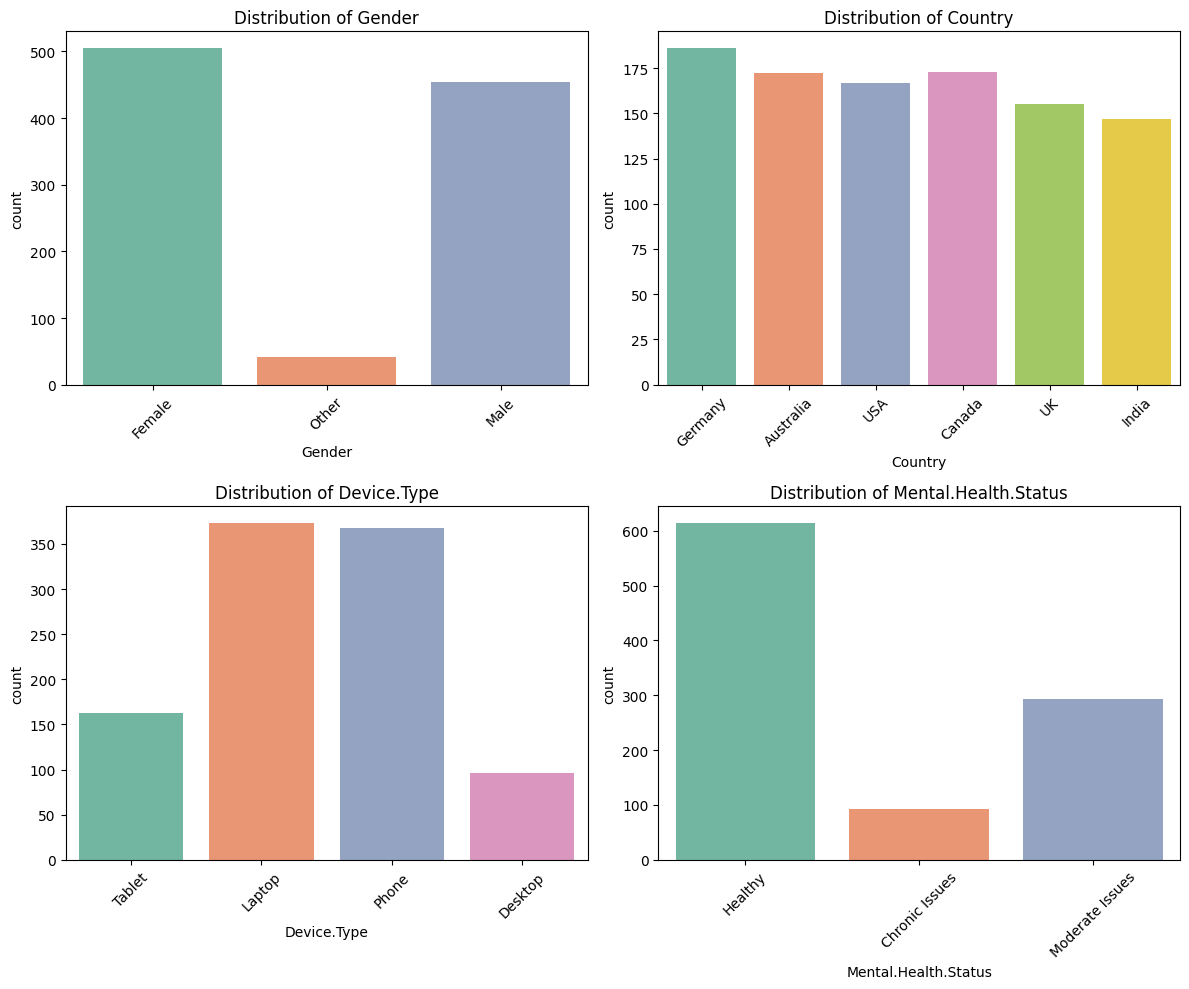

In [10]:
# Categorical features distribution
categorical_cols = df.select_dtypes(include="object").columns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue=col, palette="Set2", legend=False, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)
    
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Categorical Feature Analysis

1. **Gender Distribution**
   - The dataset is fairly **gender-balanced**, with **Female (~51%)** slightly outnumbering **Male (~45%)**.
   - The **Other** gender category is minimal (~4%).

2. **Country Distribution**
   - Representation is **fairly even across countries**, with Germany having the largest share (~19%) and India the lowest (~15%).
   - This suggests a **geographically diverse dataset** without a single dominant region.

3. **Device Type Distribution**
   - **Laptops (~37%)** and **Phones (~36%)** are the most common devices used.
   - **Tablets (~16%)** and **Desktops (~10%)** are less preferred, showing a **strong preference for portable technology**.

4. **Mental Health Status**
   - The majority of respondents report being **Healthy (~61%)**.
   - **Moderate Issues (~30%)** form a significant group, while **Chronic Issues (~9%)** are the least reported.
   - Indicates that while most are healthy, **mental health challenges are still notable** in the sample.

---

**Key Insights:**
- The sample is **gender-balanced** and **country distribution is even**, allowing for broad comparisons.
- Technology usage skews towards **portable devices** (laptops, phones).
- Mental health data shows **potential areas for intervention**, with ~40% reporting issues.

---

# =========================
# Bivariate Analysis
# =========================

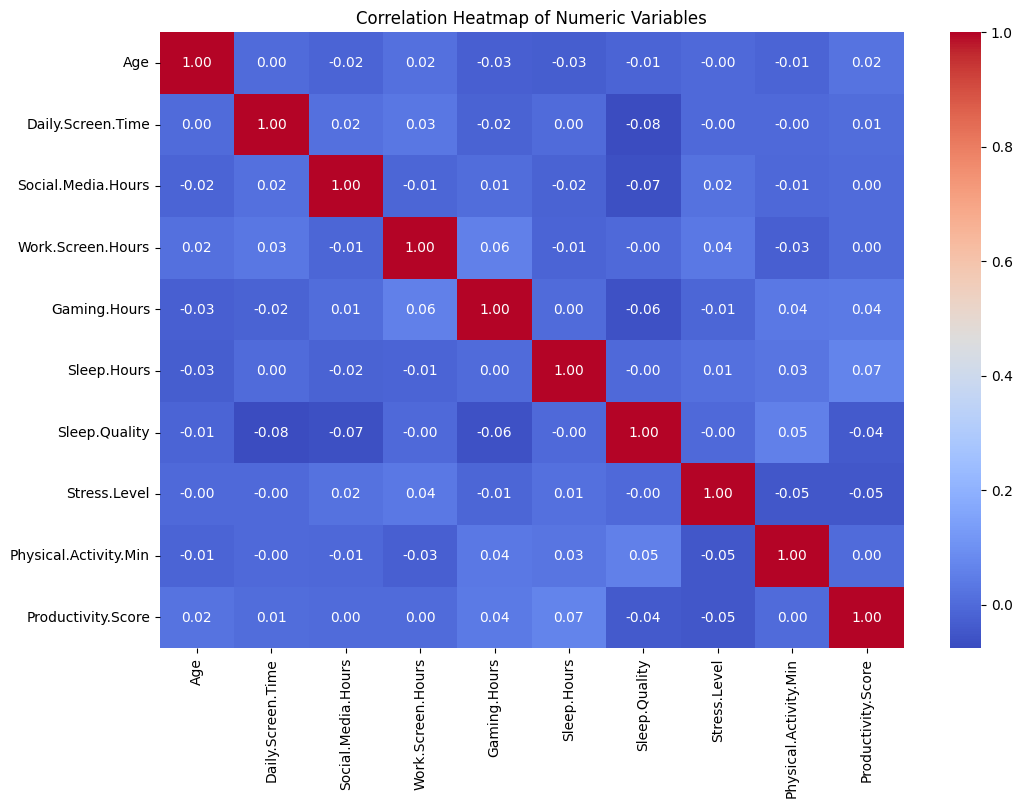

In [11]:
# Correlation heatmap for numeric variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

### Correlation Heatmap Insights

- The heatmap shows **correlations between numeric variables**, with values ranging from **-1 to 1**.  
- Most correlations are **close to 0**, indicating **weak or no linear relationships** among variables.  
- A few observations:
  - **Sleep Hours** has a slight positive correlation (~0.07) with **Productivity Score**.  
  - **Stress Level** shows a small negative correlation (~-0.05) with **Productivity Score**.  
  - No strong multicollinearity is present; all absolute correlations are **below 0.1**.  
- Overall, the dataset’s numeric features are largely **independent**, meaning productivity is not strongly predicted by any single numeric factor alone.

---

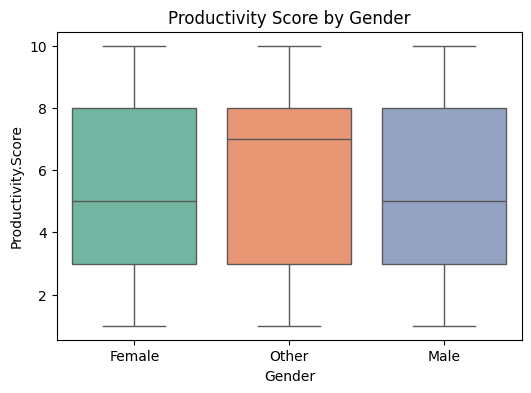

In [12]:
# Example: Gender vs Productivity
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Gender", y="Productivity.Score", hue="Gender", palette="Set2", legend=False)
plt.title("Productivity Score by Gender")
plt.show()


### Productivity Score by Gender
**Insights:**
- Median productivity scores are fairly similar across genders.  
- The spread (interquartile range) is roughly the same across groups.  
- All genders show scores ranging from **1 to 10**, suggesting no significant gender-based ceiling or floor effect.  
- Slightly higher median in the **"Other"** category compared to **Male** and **Female**.  

---

# =========================
# Multivariate Analysis
# =========================

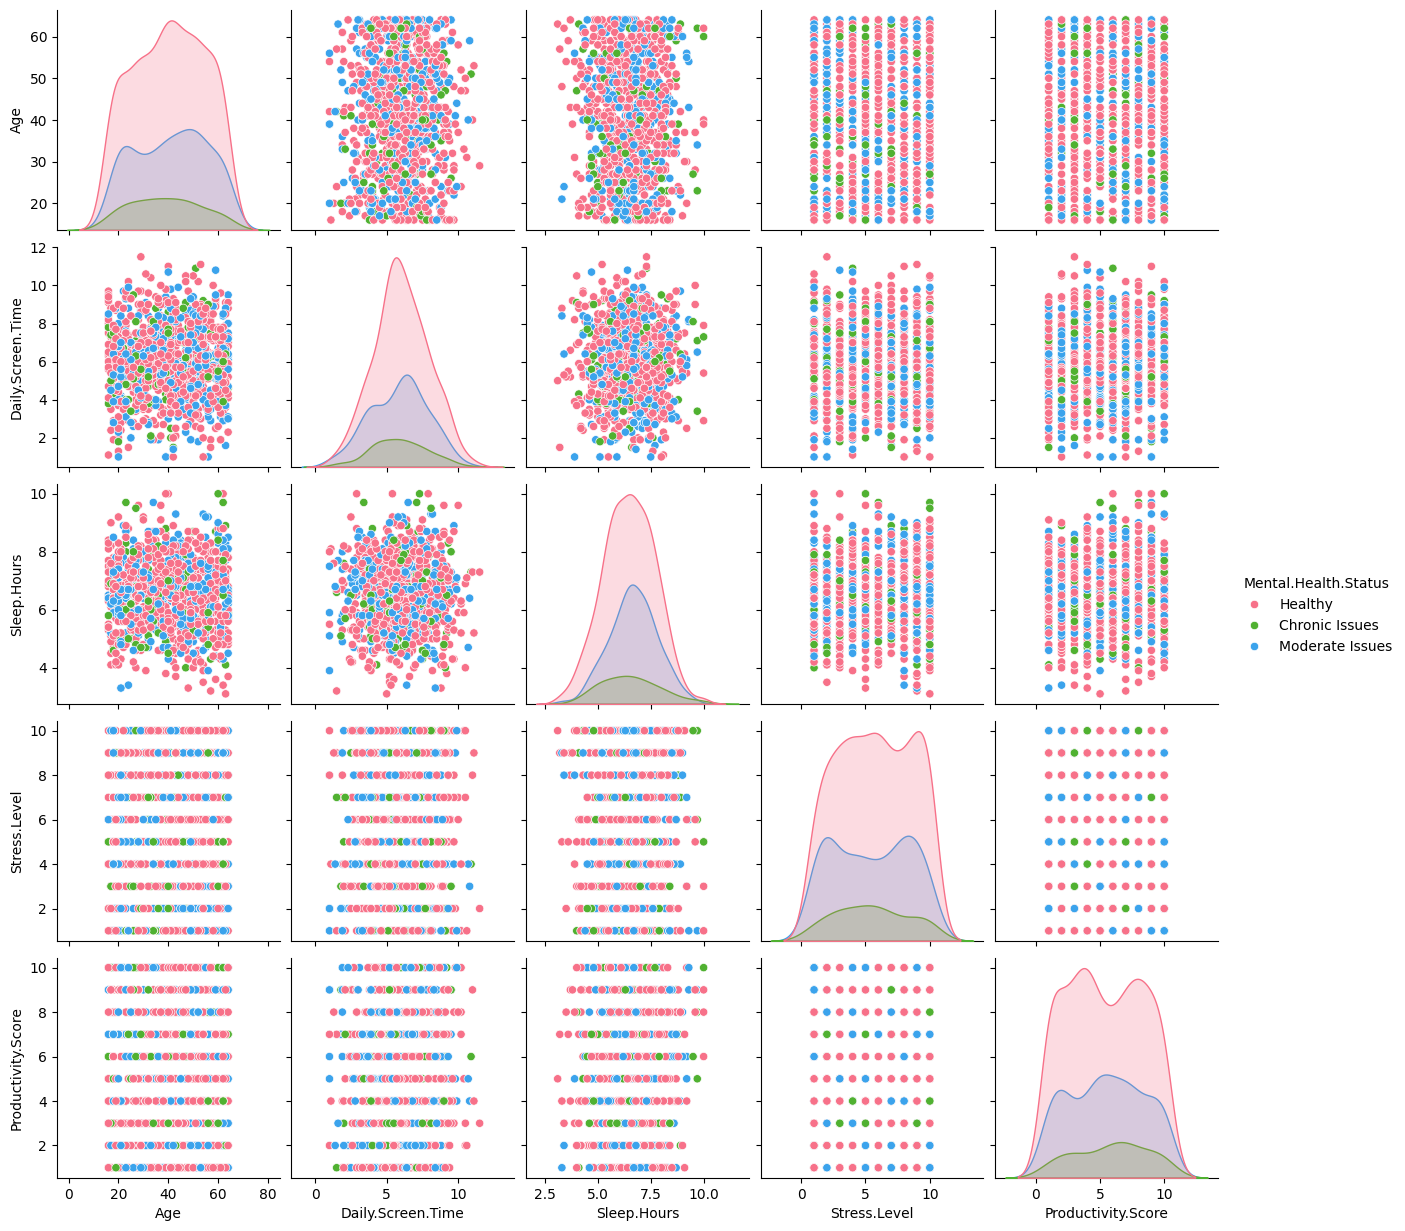

In [16]:
# Pairplot for selected features
sns.pairplot(df[["Age", 
                 "Daily.Screen.Time",
                 "Sleep.Hours",
                 "Stress.Level",
                 "Productivity.Score",
                 "Mental.Health.Status"]],
             hue="Mental.Health.Status", 
             diag_kind="kde", 
             palette="husl")
plt.show()


### Pairplot of Productivity and Lifestyle Factors
**Insights:**
- **Diagonal plots:** Distribution (KDE/histograms) of each variable across mental health categories.  
  - Healthy individuals dominate the sample size (pink).  
  - Chronic issues (green) form a much smaller subset.  
- **Scatter plots (off-diagonal):**
  - No strong linear relationships between variables

---

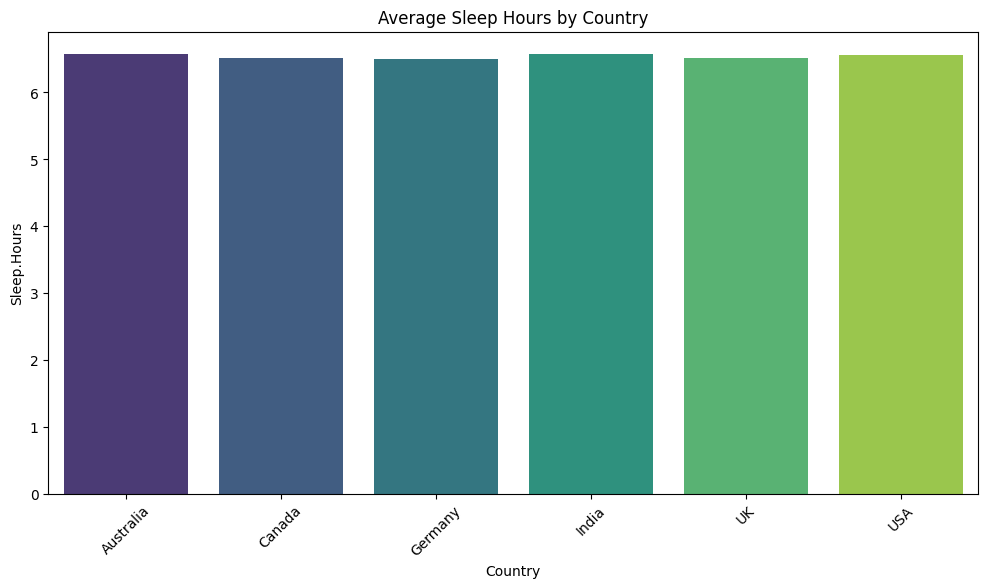

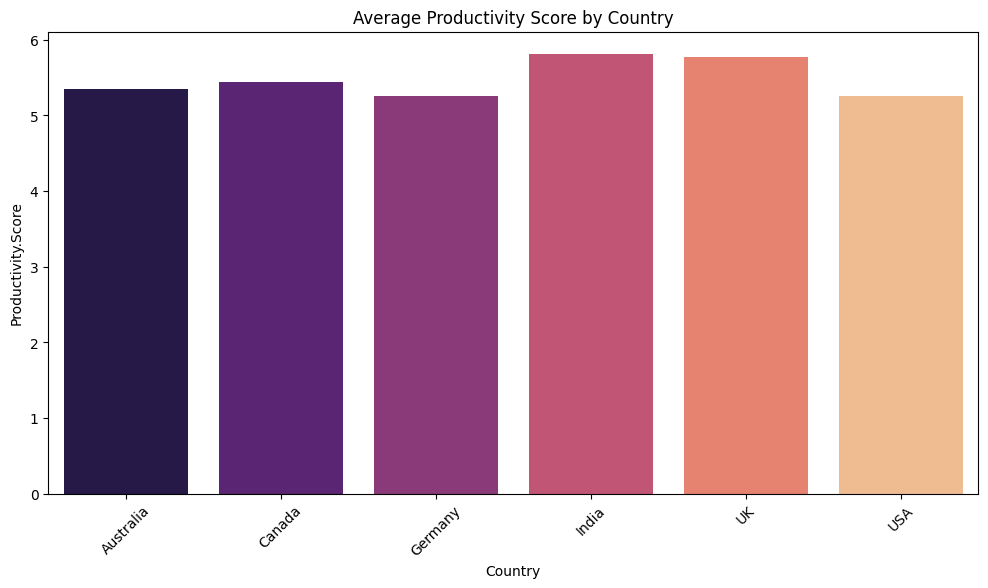

In [14]:
# Group comparison: Avg Sleep Hours & Productivity by Country
plt.figure(figsize=(12,6))
country_summary = df.groupby("Country")[["Sleep.Hours","Productivity.Score"]].mean().reset_index()
sns.barplot(data=country_summary, x="Country", y="Sleep.Hours", hue="Country", palette="viridis", legend=False)
plt.title("Average Sleep Hours by Country")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=country_summary, x="Country", y="Productivity.Score", hue="Country", palette="magma", legend=False)
plt.title("Average Productivity Score by Country")
plt.xticks(rotation=45)
plt.show()

## Average Sleep Hours by Country
**Insights:**
- Across all countries, average sleep hours are **between 6.5 and 7 hours**.  
- Sleep duration is relatively consistent with minimal variation.  
- Australia and India show slightly higher average sleep hours compared to Germany and the UK.  
- USA is near the higher end as well, suggesting most countries report fairly balanced sleep habits.  

---

## Average Productivity Score by Country
**Insights:**
- Productivity scores vary slightly more than sleep hours.  
- **India and the UK** report the highest average productivity scores (~5.8).  
- **USA and Germany** show the lowest averages (~5.2–5.3).  
- Australia and Canada fall in the middle range (~5.3–5.4).  
- Despite similar sleep averages, productivity levels differ across countries, suggesting other factors (e.g., stress, screen time, cultural work practices) may play a role.  

---
